# India Crime Data Analysis

### The dataset used in this project is available publicly on Kaggle: https://www.kaggle.com/datasets/sudhanvahg/indian-crimes-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
crime=pd.read_csv("crime_dataset_india.csv")
crime

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40155,40156,01-08-2024 16:00,07-31-2024 03:00,31-07-2024 05:05,Kolkata,312,COUNTERFEITING,78,F,Firearm,Other Crime,12,No,NaN
40156,40157,31-07-2024 14:00,07-31-2024 04:00,31-07-2024 04:14,Mumbai,300,ILLEGAL POSSESSION,75,F,NaN,Other Crime,2,Yes,29-09-2024 14:00
40157,40158,02-08-2024 03:00,07-31-2024 05:00,31-07-2024 21:33,Kanpur,423,VEHICLE - STOLEN,68,M,Other,Violent Crime,6,No,NaN
40158,40159,01-08-2024 19:00,07-31-2024 06:00,31-07-2024 11:05,Patna,311,SEXUAL ASSAULT,11,M,Blunt Object,Violent Crime,1,No,NaN


# EDA 

In [3]:
crime.shape

(40160, 14)

In [4]:
crime.columns

Index(['Report Number', 'Date Reported', 'Date of Occurrence',
       'Time of Occurrence', 'City', 'Crime Code', 'Crime Description',
       'Victim Age', 'Victim Gender', 'Weapon Used', 'Crime Domain',
       'Police Deployed', 'Case Closed', 'Date Case Closed'],
      dtype='object')

In [5]:
crime.dtypes

Report Number          int64
Date Reported         object
Date of Occurrence    object
Time of Occurrence    object
City                  object
Crime Code             int64
Crime Description     object
Victim Age             int64
Victim Gender         object
Weapon Used           object
Crime Domain          object
Police Deployed        int64
Case Closed           object
Date Case Closed      object
dtype: object

In [6]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Report Number       40160 non-null  int64 
 1   Date Reported       40160 non-null  object
 2   Date of Occurrence  40160 non-null  object
 3   Time of Occurrence  40160 non-null  object
 4   City                40160 non-null  object
 5   Crime Code          40160 non-null  int64 
 6   Crime Description   40160 non-null  object
 7   Victim Age          40160 non-null  int64 
 8   Victim Gender       40160 non-null  object
 9   Weapon Used         34370 non-null  object
 10  Crime Domain        40160 non-null  object
 11  Police Deployed     40160 non-null  int64 
 12  Case Closed         40160 non-null  object
 13  Date Case Closed    20062 non-null  object
dtypes: int64(4), object(10)
memory usage: 4.3+ MB


In [7]:
crime.describe()

,Report Number,Crime Code,Victim Age,Police Deployed
count,40160.000000,40160.000000,40160.00000,40160.000000
mean,20080.500000,349.360259,44.49126,10.006250
std,11593.337742,144.169205,20.22555,5.467951
min,1.000000,100.000000,10.00000,1.000000
25%,10040.750000,225.000000,27.00000,5.000000
50%,20080.500000,349.000000,44.00000,10.000000
75%,30120.250000,474.000000,62.00000,15.000000
max,40160.000000,599.000000,79.00000,19.000000


In [8]:
crime.index

RangeIndex(start=0, stop=40160, step=1)

In [9]:
crime.columns.unique()

Index(['Report Number', 'Date Reported', 'Date of Occurrence',
       'Time of Occurrence', 'City', 'Crime Code', 'Crime Description',
       'Victim Age', 'Victim Gender', 'Weapon Used', 'Crime Domain',
       'Police Deployed', 'Case Closed', 'Date Case Closed'],
      dtype='object')

# Data Wrangling

In [10]:
crime.isnull().sum()

Report Number             0
Date Reported             0
Date of Occurrence        0
Time of Occurrence        0
City                      0
Crime Code                0
Crime Description         0
Victim Age                0
Victim Gender             0
Weapon Used            5790
Crime Domain              0
Police Deployed           0
Case Closed               0
Date Case Closed      20098
dtype: int64

### handling missing values of Weapon columns data

#### In crime data, missing Weapon Used usually means one of these:
- No weapon was used
- Weapon not reported
- Weapon information unavailable

#### So treating it as “Unknown / Not Reported” is the correct analytical approach.

In [11]:
crime['Weapon Used'] = crime['Weapon Used'].fillna('Not Reported')

In [12]:
crime['Weapon Used'].unique()

array(['Blunt Object', 'Poison', 'Firearm', 'Other', 'Knife',
       'Explosives', 'Not Reported'], dtype=object)

- Other - 	Weapon used but not classified
- Not Reported - 	Weapon info missing

### Checking for duplicate values

In [13]:
crime['Report Number'].duplicated().sum()

np.int64(0)

In [14]:
crime.duplicated().sum()

np.int64(0)

In [15]:
crime.to_csv("crime_dataset_india_cleaned.csv", index=False)
### Why index=False?  Prevents Pandas from saving the row index as an extra column

In [16]:
crime=pd.read_csv("crime_dataset_india_cleaned.csv")
crime

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40155,40156,01-08-2024 16:00,07-31-2024 03:00,31-07-2024 05:05,Kolkata,312,COUNTERFEITING,78,F,Firearm,Other Crime,12,No,NaN
40156,40157,31-07-2024 14:00,07-31-2024 04:00,31-07-2024 04:14,Mumbai,300,ILLEGAL POSSESSION,75,F,Not Reported,Other Crime,2,Yes,29-09-2024 14:00
40157,40158,02-08-2024 03:00,07-31-2024 05:00,31-07-2024 21:33,Kanpur,423,VEHICLE - STOLEN,68,M,Other,Violent Crime,6,No,NaN
40158,40159,01-08-2024 19:00,07-31-2024 06:00,31-07-2024 11:05,Patna,311,SEXUAL ASSAULT,11,M,Blunt Object,Violent Crime,1,No,NaN


# INSIGHTS:

In [17]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Report Number       40160 non-null  int64 
 1   Date Reported       40160 non-null  object
 2   Date of Occurrence  40160 non-null  object
 3   Time of Occurrence  40160 non-null  object
 4   City                40160 non-null  object
 5   Crime Code          40160 non-null  int64 
 6   Crime Description   40160 non-null  object
 7   Victim Age          40160 non-null  int64 
 8   Victim Gender       40160 non-null  object
 9   Weapon Used         40160 non-null  object
 10  Crime Domain        40160 non-null  object
 11  Police Deployed     40160 non-null  int64 
 12  Case Closed         40160 non-null  object
 13  Date Case Closed    20062 non-null  object
dtypes: int64(4), object(10)
memory usage: 4.3+ MB


# City wise Insights

## Which cities report the most crimes?

In [18]:
top_cities=crime['City'].value_counts().head(10).reset_index(name='Total Crime')
top_cities

,City,Total Crime
0,Delhi,5400
1,Mumbai,4415
2,Bangalore,3588
3,Hyderabad,2881
4,Kolkata,2518
5,Chennai,2493
6,Pune,2212
7,Ahmedabad,1817
8,Jaipur,1479
9,Lucknow,1456


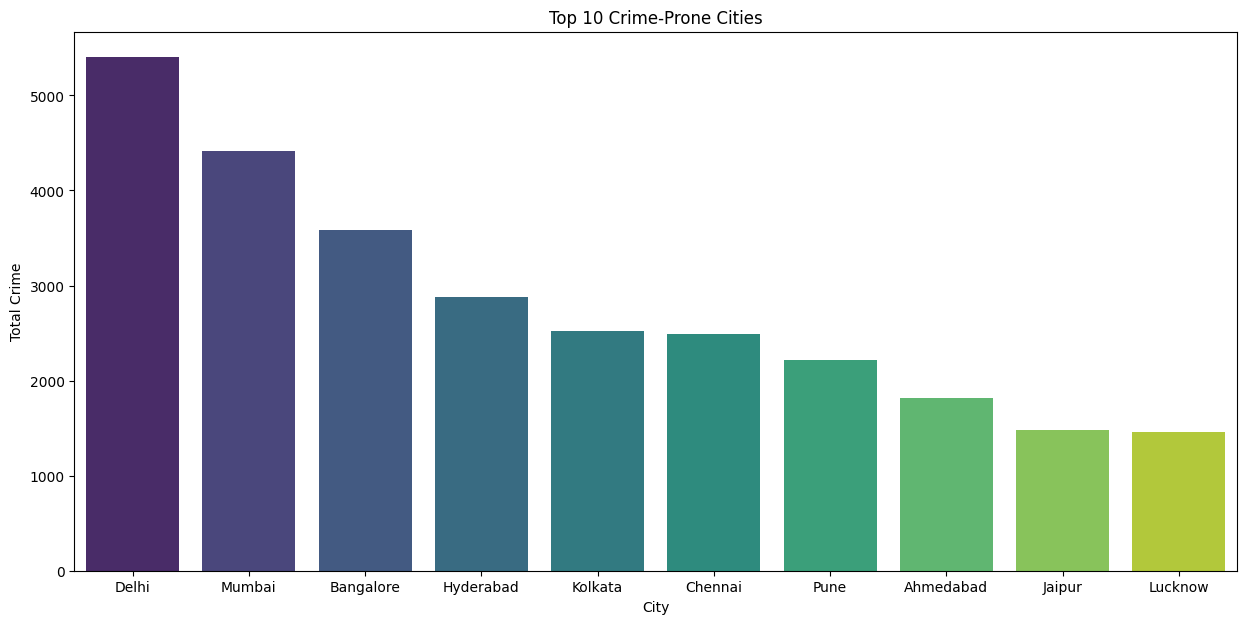

In [19]:
plt.figure(figsize=[15,7])
sns.barplot(data=top_cities,x='City',y='Total Crime',hue='City',palette='viridis')
plt.title("Top 10 Crime-Prone Cities")
plt.show()

### Insights:
* **Delhi, Mumbai, and Bangalore** have the highest crime counts, showing that crimes are more concentrated in major metropolitan cities.
* Crime levels steadily decrease across other cities, suggesting the need for **focused, city-specific policing strategies**.


## Which cities have the highest/lowest case closure rates?

In [20]:
crime.groupby('City')['Case Closed'].apply(lambda x: (x == 'Yes').mean() * 100).reset_index(name='Closure_Rate_%').sort_values(by='Closure_Rate_%',ascending= False)

,City,Closure_Rate_%
25,Thane,53.682720
15,Ludhiana,52.956636
6,Faridabad,52.824859
22,Rajkot,51.562500
12,Kanpur,51.348921
14,Lucknow,51.167582
1,Ahmedabad,51.128233
24,Surat,51.125113
10,Jaipur,51.048005
28,Visakhapatnam,50.961538


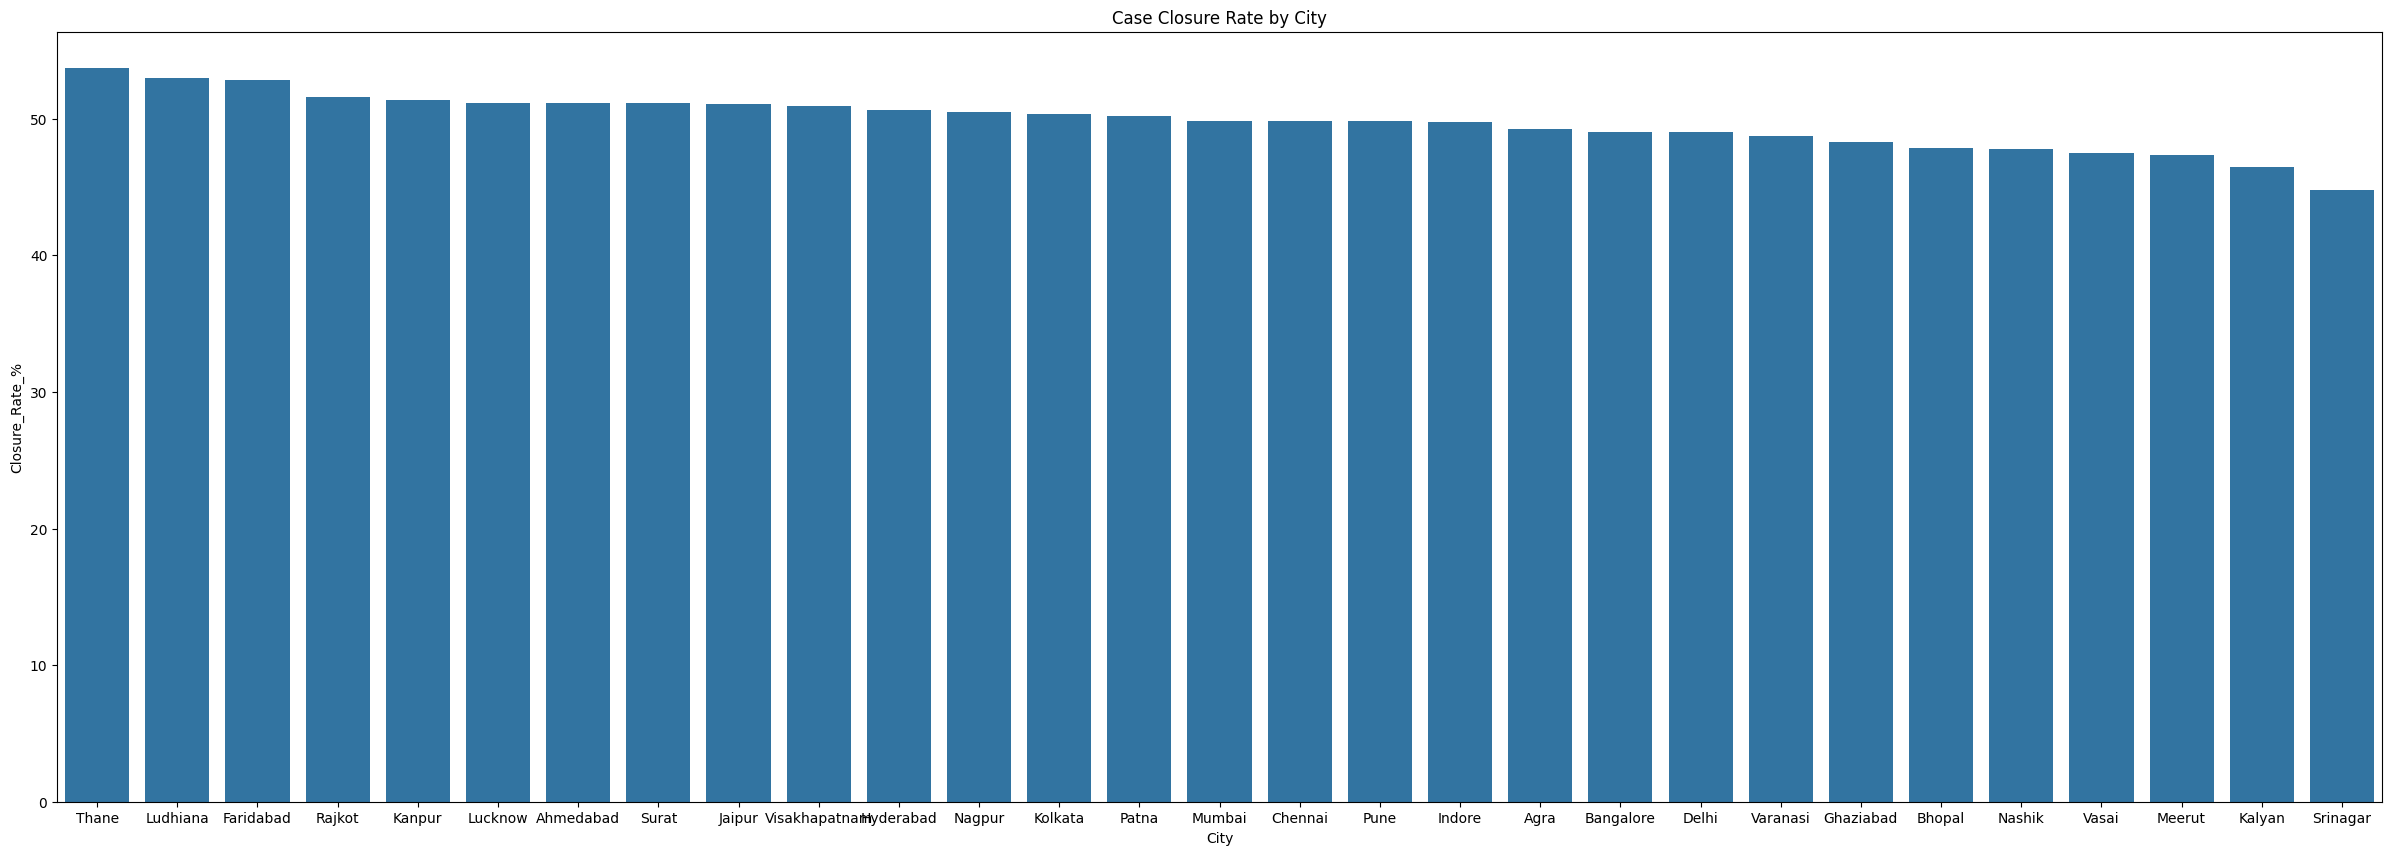

In [21]:
city_rate = (
    crime.groupby('City')['Case Closed']
         .apply(lambda x: (x == 'Yes').mean() * 100)
         .reset_index(name='Closure_Rate_%').sort_values(by='Closure_Rate_%',ascending= False)
)

plt.figure(figsize=(30,10))
sns.barplot(data=city_rate, x='City', y='Closure_Rate_%')
plt.title('Case Closure Rate by City')
plt.show()

### Insights:

* **Thane, Ludhiana, and Faridabad** have the highest case closure rates (above 52%), indicating relatively better investigation and case resolution efficiency.
* **Metro cities like Delhi, Bangalore, and Mumbai** show closure rates around **49–50%**, suggesting room for improvement despite higher police resources.
* **Srinagar, Kalyan, and Meerut** have the lowest closure rates, highlighting areas where case follow-up and enforcement effectiveness need strengthening.


## Which cities report the highest violent crimes?

In [22]:
crime[crime['Crime Domain']=='Violent Crime'].groupby('City')['City'].size().sort_values(ascending=False).head(5)

City
Delhi        1559
Mumbai       1270
Bangalore    1008
Hyderabad     855
Kolkata       700
Name: City, dtype: int64

In [23]:
violent_crime=crime[crime['Crime Domain']=='Violent Crime'].groupby('City')['City'].size().sort_values(ascending=False).head(5).reset_index(name='ViolentCrime_Count')
violent_crime

,City,ViolentCrime_Count
0,Delhi,1559
1,Mumbai,1270
2,Bangalore,1008
3,Hyderabad,855
4,Kolkata,700


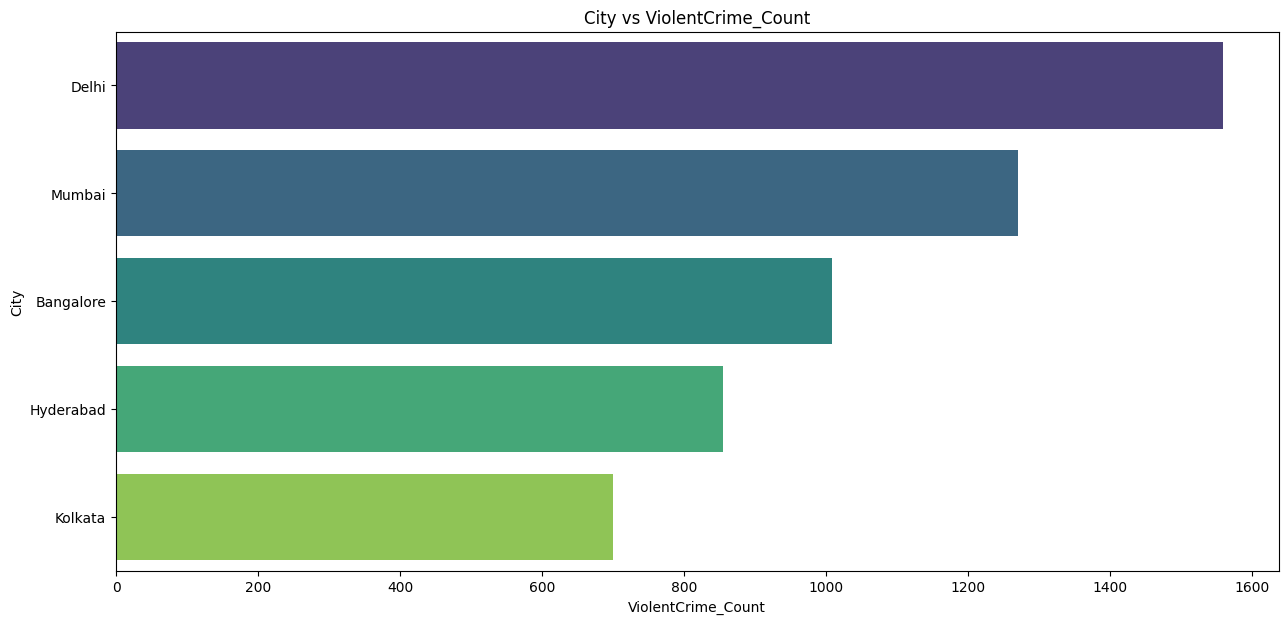

In [24]:
plt.figure(figsize=[15,7])
sns.barplot(data=violent_crime,y='City',x='ViolentCrime_Count',hue='City',palette='viridis')
plt.title("City vs ViolentCrime_Count")
plt.show()

### Insights
* **Delhi, Mumbai, and Bangalore** report the highest violent crime counts, showing violent crimes are mainly concentrated in major metropolitan cities.

# Crime Type & Domain Insights

## Which crime domain is most common?

In [25]:
crime['Crime Domain'].value_counts()

Crime Domain
Other Crime         22948
Violent Crime       11472
Fire Accident        3825
Traffic Fatality     1915
Name: count, dtype: int64

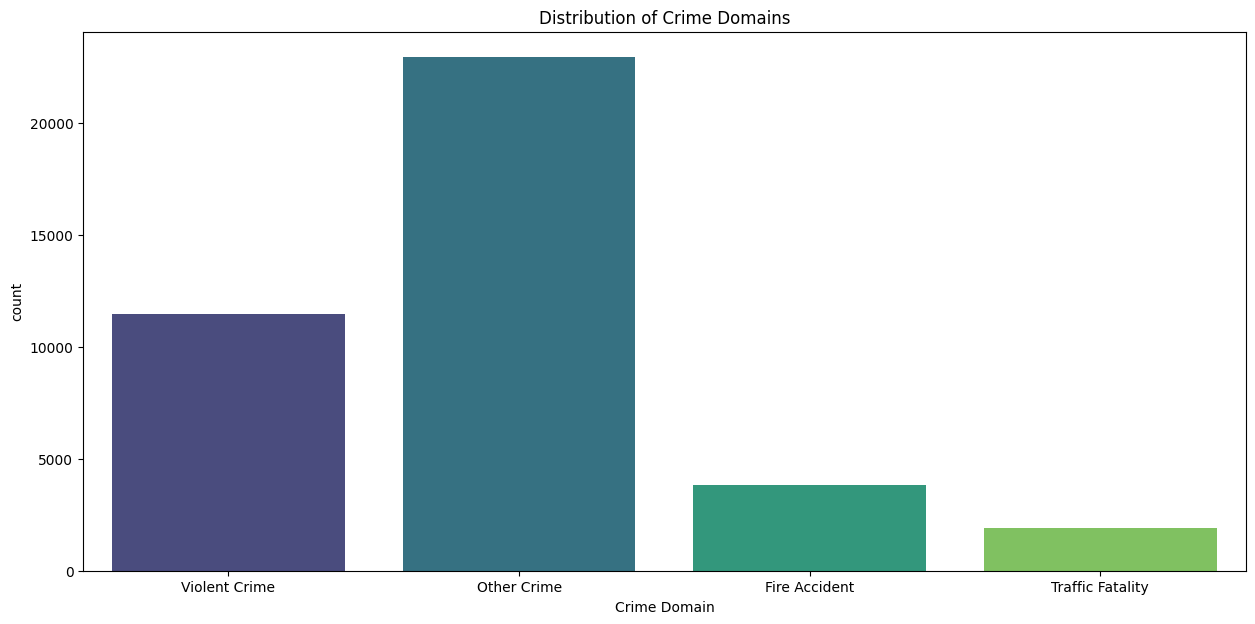

In [26]:
plt.figure(figsize=[15,7])
sns.countplot(data=crime,x='Crime Domain',hue='Crime Domain',palette='viridis')
plt.title("Distribution of Crime Domains")
plt.show()
    

### Insights:

* **Other Crime** is the most common crime domain, followed by **Violent Crime**, while **Fire Accidents** and **Traffic Fatalities** occur much less frequently.


## Which crime descriptions occur most frequently?

In [27]:
count=crime['Crime Description'].value_counts().reset_index(name='Total_Count')
count

,Crime Description,Total_Count
0,BURGLARY,1980
1,VANDALISM,1975
2,FRAUD,1965
3,DOMESTIC VIOLENCE,1932
4,FIREARM OFFENSE,1931
5,ROBBERY,1928
6,KIDNAPPING,1920
7,IDENTITY THEFT,1918
8,SEXUAL ASSAULT,1917
9,ASSAULT,1915


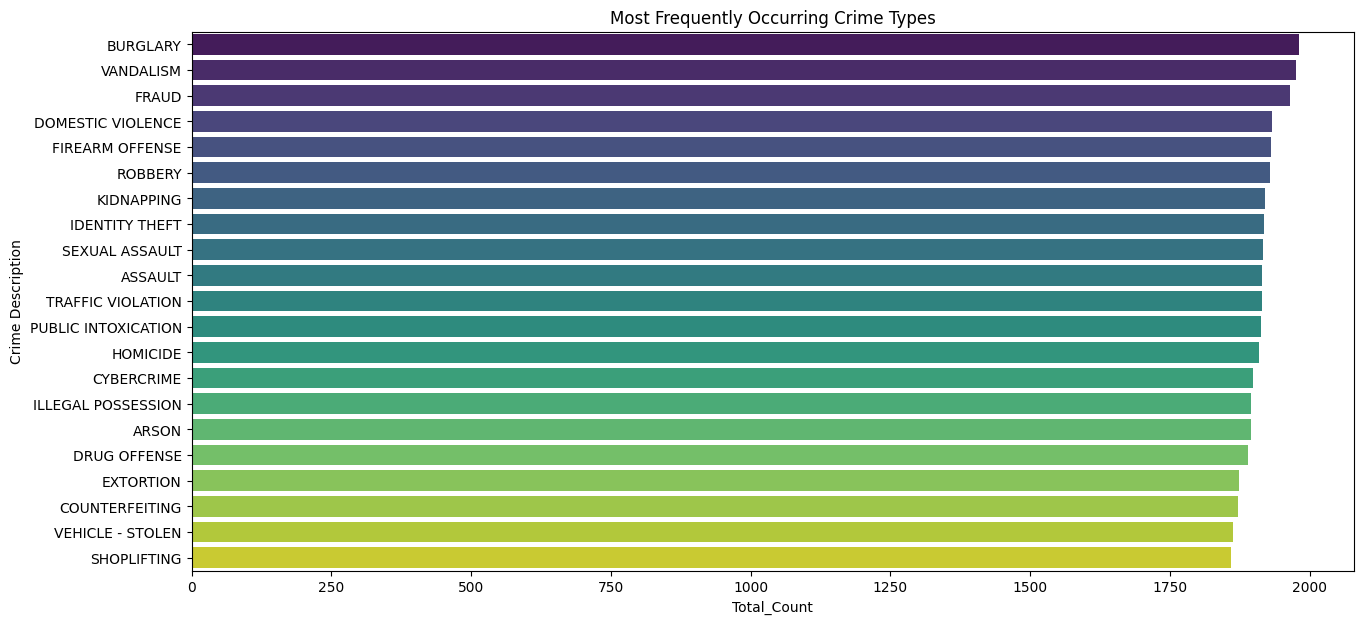

In [28]:
plt.figure(figsize=[15,7])
sns.barplot(data=count,y='Crime Description',x='Total_Count',hue='Crime Description',palette='viridis')
plt.title("Most Frequently Occurring Crime Types")
plt.show()

### Insights:
* **Burglary, Vandalism, and Fraud** are the most frequently reported crime types.
* Several crimes show **similar high occurrence levels**, indicating crime is spread across multiple categories rather than dominated by a single type.
* Both **property-related and violent crimes** appear prominently, highlighting the need for diverse policing strategies.


## Which crime domains have the lowest case-closure rates?

In [29]:
closure_rates=crime.groupby('Crime Domain')['Case Closed'].apply(lambda x:(x=='Yes').mean()*100).sort_values().reset_index(name="case_closue_rates_%")
closure_rates

,Crime Domain,case_closue_rates_%
0,Fire Accident,49.385621
1,Violent Crime,49.921548
2,Other Crime,50.052292
3,Traffic Fatality,50.130548


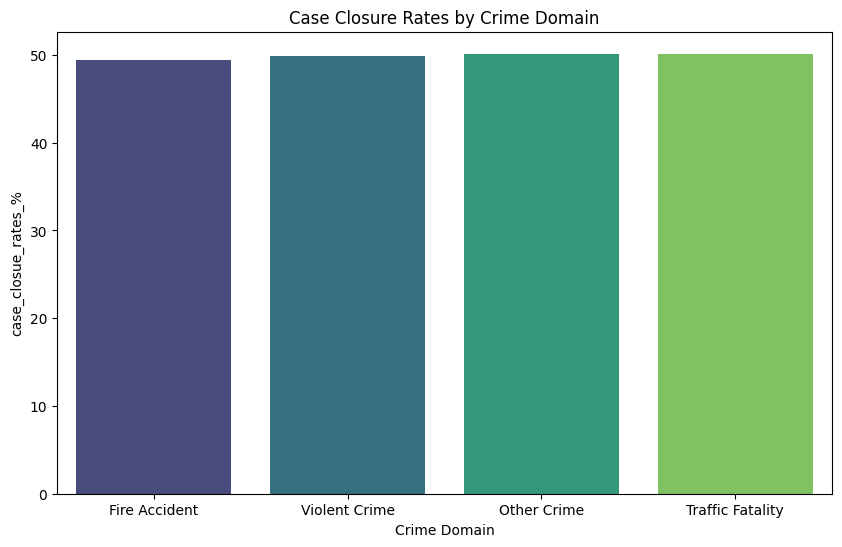

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(data=closure_rates, x='Crime Domain', y='case_closue_rates_%', hue='Crime Domain',palette='viridis')
plt.title('Case Closure Rates by Crime Domain')
plt.show()

### Insigts:

* **Fire Accident** has the **lowest case-closure rate**, followed by **Violent Crime**, indicating greater challenges in resolving these cases.
* **Traffic Fatality** shows the highest closure rate among the listed domains, though overall differences are small (around 49–50%).


## Which crime types need more police attention?

In [31]:
avg_police = crime.groupby('Crime Description')['Police Deployed'].mean().sort_values(ascending=False).head(10).reset_index()
avg_police

,Crime Description,Police Deployed
0,FRAUD,10.234606
1,VANDALISM,10.184810
2,COUNTERFEITING,10.113308
3,BURGLARY,10.085859
4,ILLEGAL POSSESSION,10.068074
5,IDENTITY THEFT,10.066736
6,DOMESTIC VIOLENCE,10.062112
7,EXTORTION,10.058729
8,FIREARM OFFENSE,10.056965
9,TRAFFIC VIOLATION,10.044386


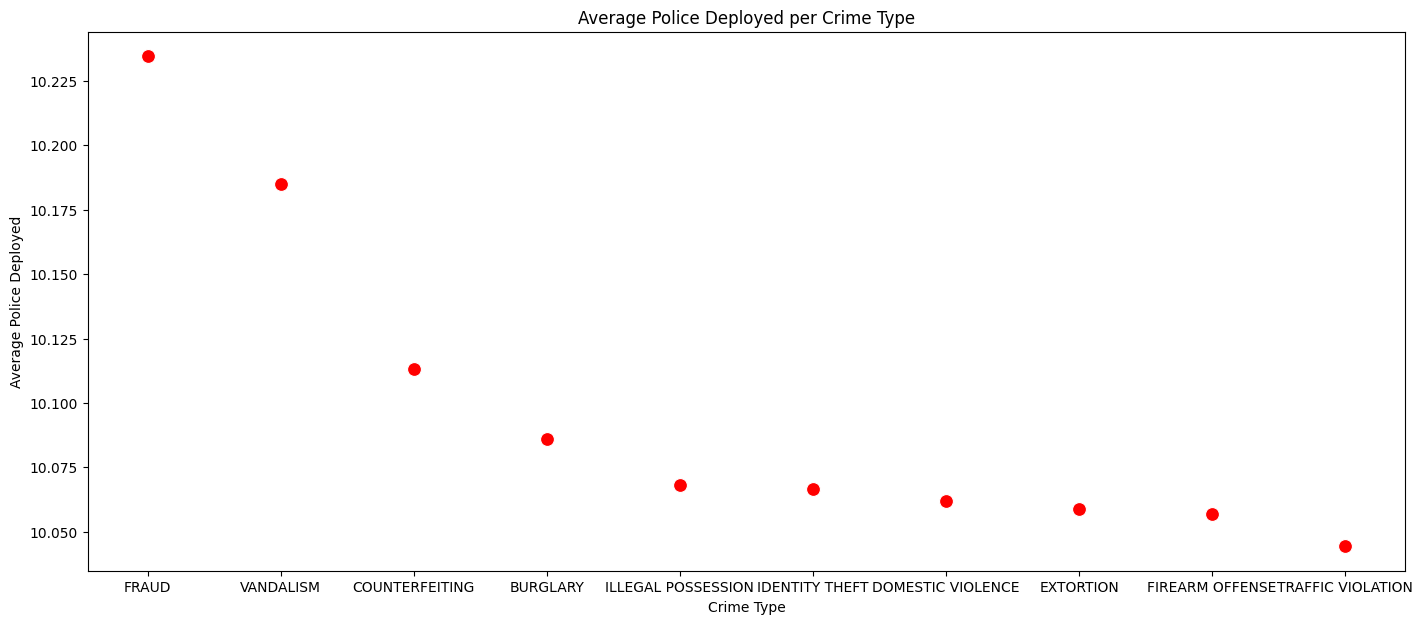

In [32]:
plt.figure(figsize=(17,7))
sns.scatterplot(data=avg_police, x='Crime Description', y='Police Deployed', s=100, color='red')
plt.title('Average Police Deployed per Crime Type')
plt.ylabel('Average Police Deployed')
plt.xlabel('Crime Type')
plt.show()

### Insight:

* **Fraud, Vandalism, and Counterfeiting** have the highest average police deployment, showing they require more intensive law enforcement effort.
* The similar average values suggest **police resources are distributed fairly evenly** across major crime types.



# Victim Analysis

## Which age group is most affected by crime?

In [33]:
age_count=crime['Victim Age'].value_counts().head(10)
age_count

Victim Age
25    636
22    636
35    619
34    612
40    608
76    607
11    606
73    601
60    601
61    599
Name: count, dtype: int64

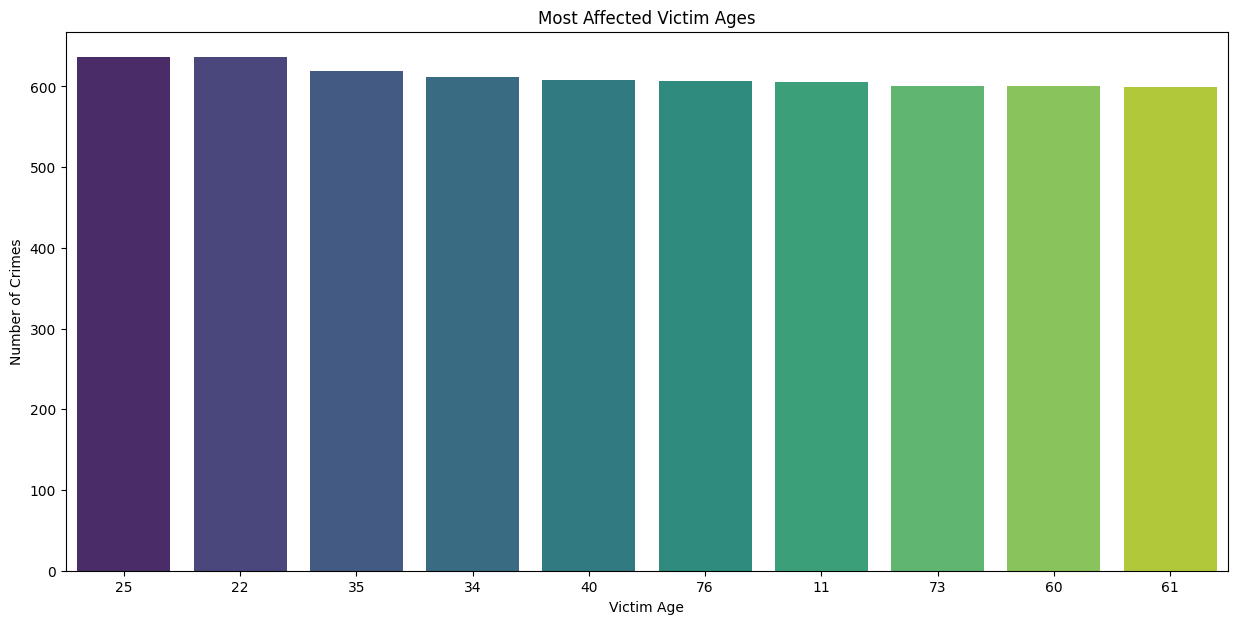

In [34]:
plt.figure(figsize=[15,7])
sns.barplot(x=age_count.index.astype(str), y=age_count.values, hue=age_count.index.astype(str),palette='viridis')
plt.title('Most Affected Victim Ages')
plt.xlabel('Victim Age')
plt.ylabel('Number of Crimes')
plt.show()

### Insights:

* **Young adults (ages 20–35)** are the most affected by crime, with ages **22 and 25** having the highest number of victims.
* This suggests that the **working-age population** faces higher exposure to crime compared to other age groups.

## Which gender is more frequently victimized?

In [35]:
crime['Victim Gender'].value_counts()

Victim Gender
F    22423
M    13405
X     4332
Name: count, dtype: int64

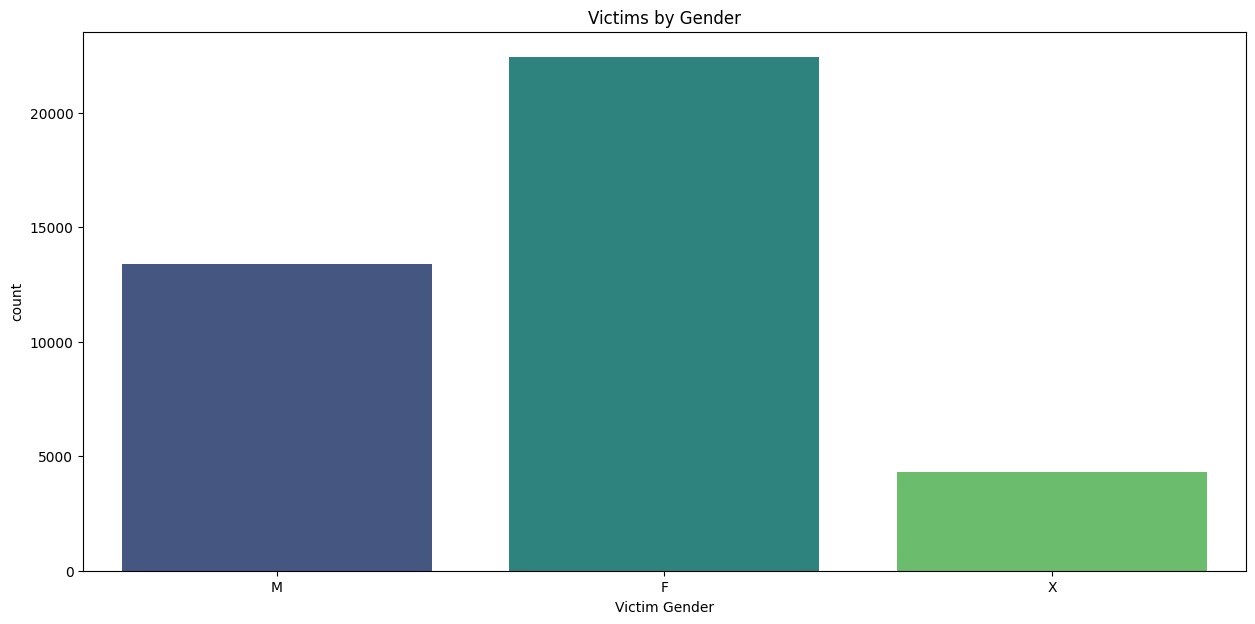

In [36]:
plt.figure(figsize=(15,7))
sns.countplot(data=crime,x='Victim Gender',hue='Victim Gender',palette='viridis')
plt.title("Victims by Gender")
plt.show()


### Insights:
* **Females (F)** are the most frequently victimized group, followed by **Males (M)**.
* The **‘X’ category** represents a smaller share but is still significant and should not be overlooked.


# Time-based Insights

## At what hour of day do most crimes occur?

In [37]:
pd.DatetimeIndex(crime['Time of Occurrence']).hour

Index([ 1,  6, 14, 14, 16, 17, 14,  6,  6, 17,
       ...
       19, 23,  3, 21, 12,  5,  4, 21, 11, 17],
      dtype='int32', name='Time of Occurrence', length=40160)

In [38]:
crime['occurence_hour']=pd.DatetimeIndex(crime['Time of Occurrence']).hour

In [39]:
hour_count=crime['occurence_hour'].value_counts().head(10)
hour_count

occurence_hour
11    1745
17    1721
9     1719
4     1713
3     1712
6     1708
22    1707
20    1707
5     1707
19    1701
Name: count, dtype: int64

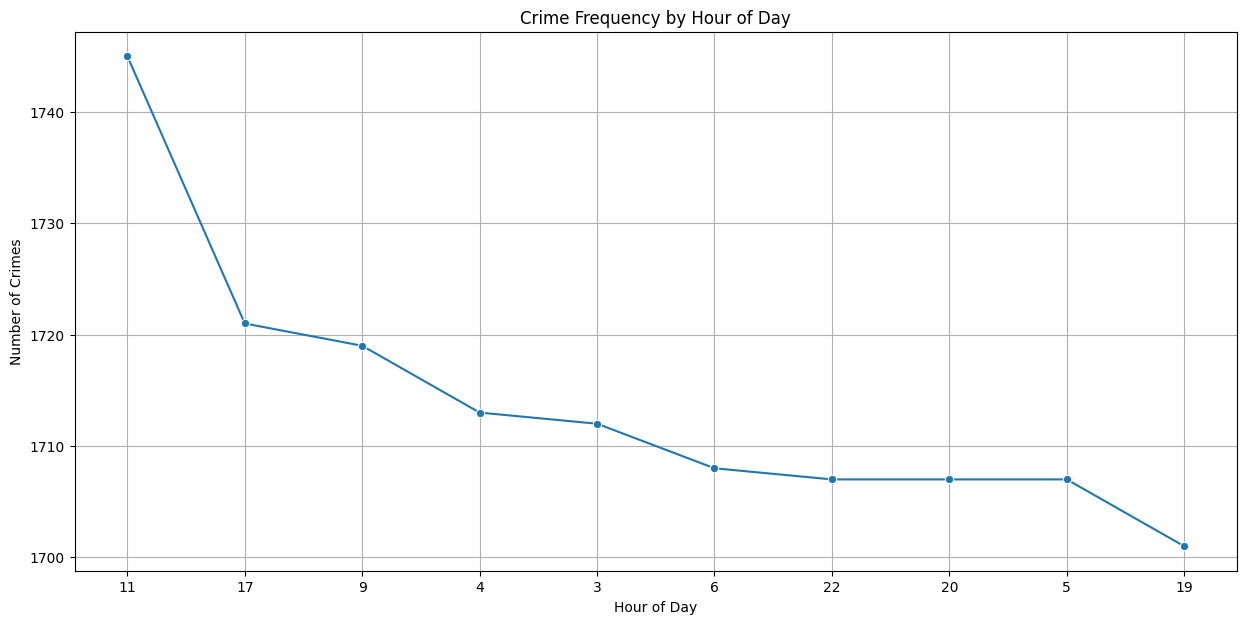

In [40]:
plt.figure(figsize=(15,7))
sns.lineplot(x=hour_count.index.astype(str),y=hour_count.values,marker='o')
plt.title("Crime Frequency by Hour of Day")
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()


### Insights:
* Crime frequency peaks around **11 AM**, **5 PM**, and **9 AM**.
* Early morning hours (3–6 AM) also show significant activity.
* Crime tends to be slightly lower late at night (~midnight), but still consistent.


## Which crime domains are more common at night?

In [41]:
crime[(crime['occurence_hour'] >= 20) | (crime['occurence_hour'] < 6)].groupby('Crime Domain')['Crime Domain'].value_counts()

Crime Domain
Fire Accident       1588
Other Crime         9526
Traffic Fatality     835
Violent Crime       4743
Name: count, dtype: int64

In [42]:
night_crime=crime[(crime['occurence_hour'] >= 20) | (crime['occurence_hour'] < 6)].groupby('Crime Domain')['Crime Domain'].value_counts().sort_values(ascending=False).reset_index(name='crime_count')
night_crime

,Crime Domain,crime_count
0,Other Crime,9526
1,Violent Crime,4743
2,Fire Accident,1588
3,Traffic Fatality,835


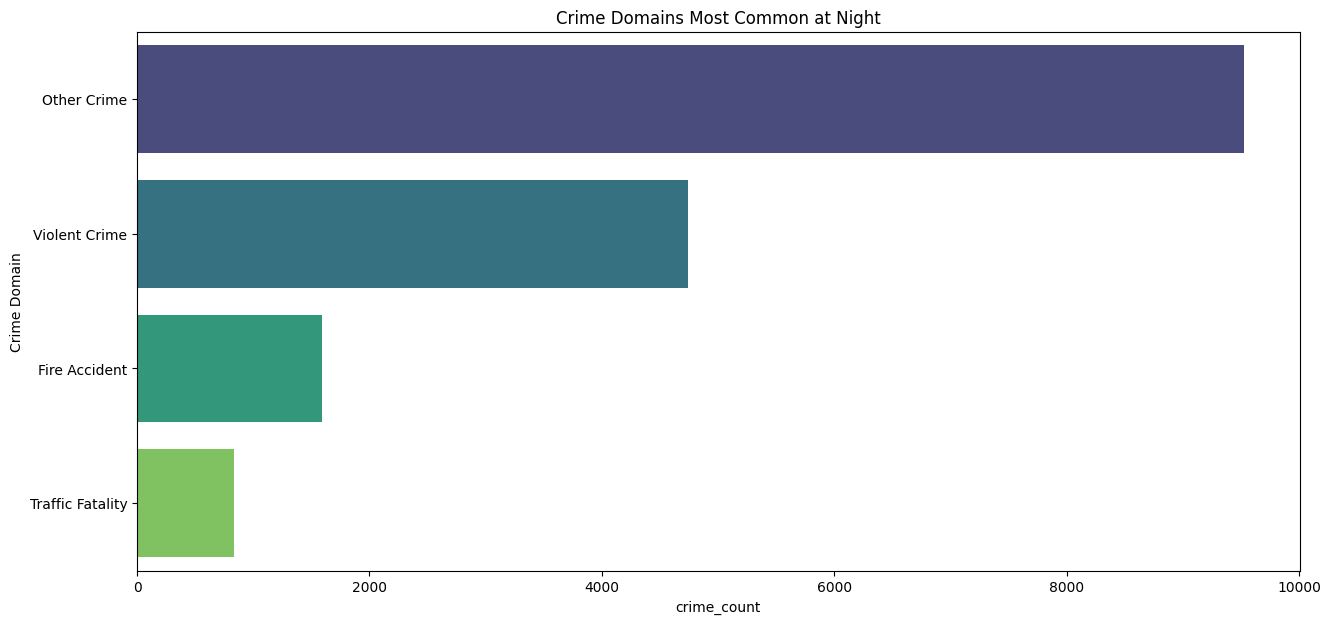

In [43]:
plt.figure(figsize=[15,7])
sns.barplot(data=night_crime,y='Crime Domain',x='crime_count',hue='Crime Domain',palette='viridis')
plt.title('Crime Domains Most Common at Night')
plt.show()

### Insights:

* **Other Crime** is the most frequent at night.
* **Violent Crime** is the second most common.
* **Fire Accidents** and **Traffic Fatalities** occur less often.


## Are crimes increasing or decreasing over time?

In [44]:
crime['Crime_Occurrence_Year']=pd.DatetimeIndex(crime['Date of Occurrence']).year

In [45]:
year_crime=crime['Crime_Occurrence_Year'].value_counts().reset_index(name='crime_count')
year_crime

,Crime_Occurrence_Year,crime_count
0,2020,8784
1,2021,8760
2,2022,8760
3,2023,8760
4,2024,5096


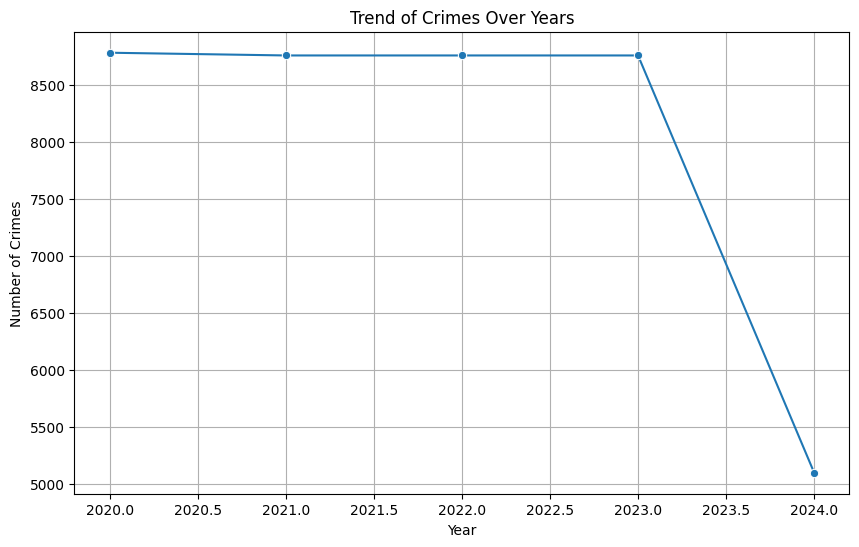

In [46]:
plt.figure(figsize=(10,6))
sns.lineplot(data=year_crime, x='Crime_Occurrence_Year', y='crime_count', marker='o')
plt.title('Trend of Crimes Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

### Insights:

* Crime counts were **stable from 2020 to 2023** (~8760 per year).
* There is a **notable decrease in 2024** (5096 crimes).
* Overall, crimes are **decreasing in the most recent year**.


# Weapons & Police Insights

## Which weapons are most frequently used in crimes?

In [47]:
weapon_count=crime['Weapon Used'].value_counts().reset_index(name='Weapon Count')
weapon_count

,Weapon Used,Weapon Count
0,Knife,5835
1,Not Reported,5790
2,Explosives,5751
3,Blunt Object,5737
4,Poison,5728
5,Other,5676
6,Firearm,5643


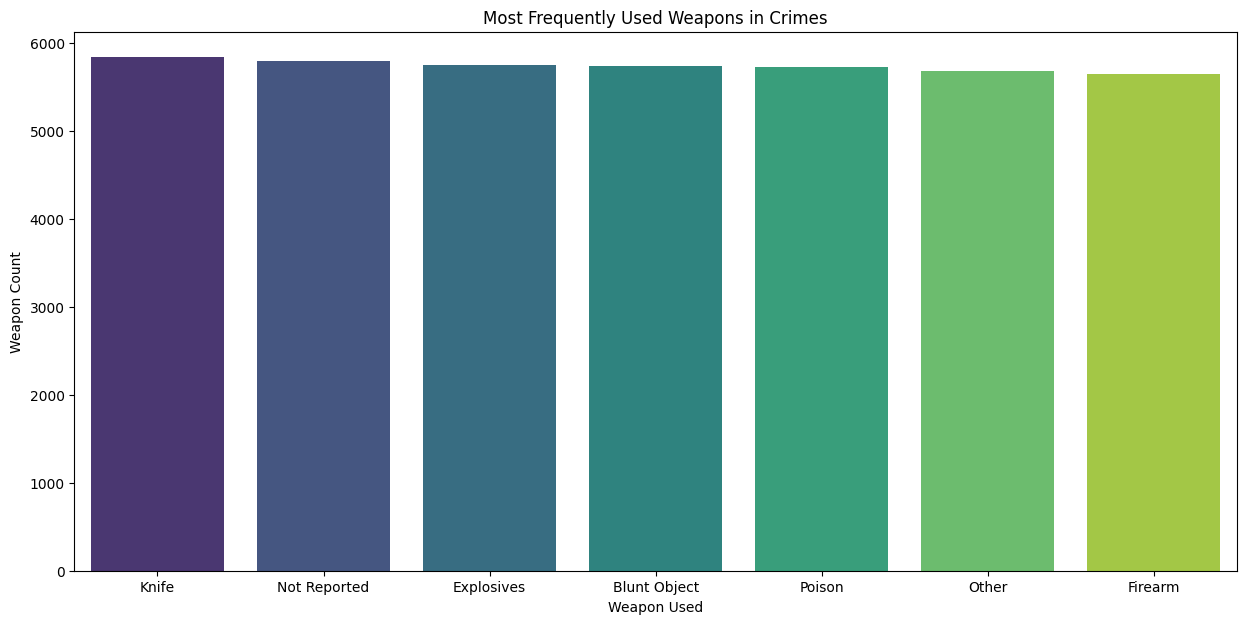

In [48]:
plt.figure(figsize=[15,7])
sns.barplot(data=weapon_count,x='Weapon Used',y='Weapon Count',hue='Weapon Used',palette='viridis')
plt.title("Most Frequently Used Weapons in Crimes")
plt.show()



### Insights:

* **Knife** is the most frequently reported weapon.
* **Not Reported** is almost as common, indicating many cases don’t specify a weapon.
* **Explosives, Blunt Objects, Poison, and Firearms** are also commonly used, with relatively similar counts.
* Overall, crimes involve a mix of weapons, but knives lead the list.

## Does higher police deployment improve case-closure rates?

In [49]:
deployed_closure=crime.groupby('Police Deployed')['Case Closed'].apply(lambda x: (x == 'Yes').mean() * 100).sort_values(ascending= False).reset_index(name='Closure_Rate_%')
deployed_closure

,Police Deployed,Closure_Rate_%
0,6,52.173913
1,12,51.934732
2,3,50.684285
3,8,50.604651
4,15,50.369344
5,5,50.363196
6,2,49.930330
7,13,49.882574
8,9,49.836525
9,16,49.831488


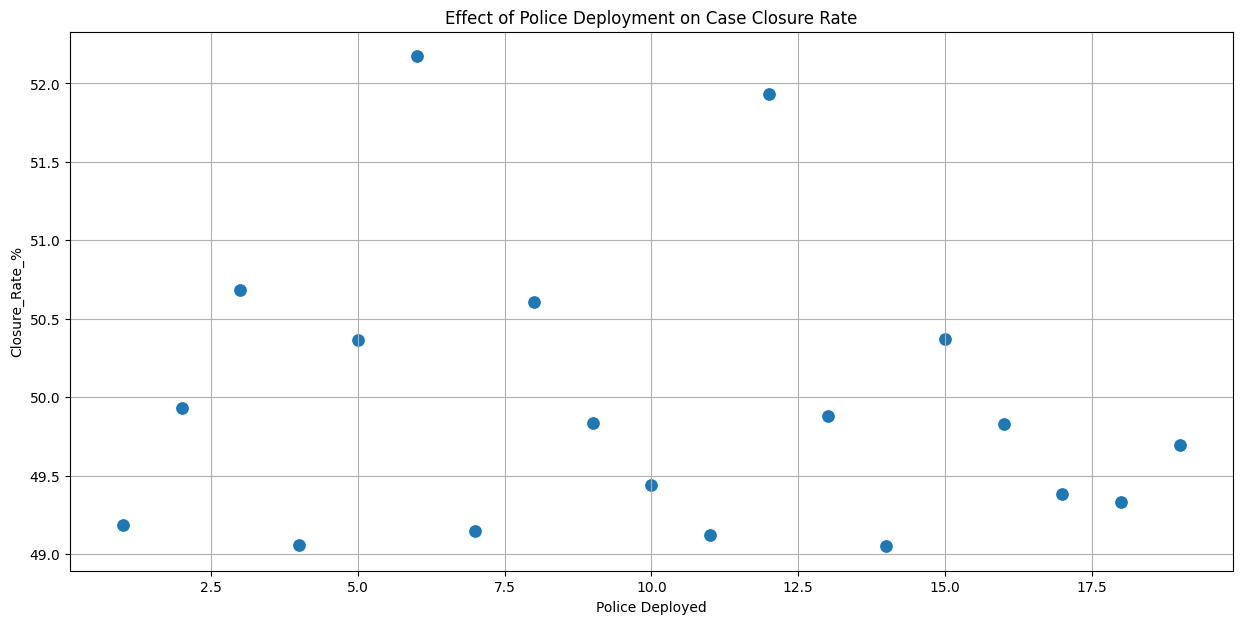

In [50]:
plt.figure(figsize=[15,7])
sns.scatterplot(data=deployed_closure,x='Police Deployed',y='Closure_Rate_%',s=100)
plt.title('Effect of Police Deployment on Case Closure Rate')
plt.grid(True)
plt.show()

### Insights:
* **No clear positive correlation** between more police deployed and higher closure rates.
* Closure rates **hover around 49–52%** regardless of the number of police.
* Suggests that simply increasing police numbers does **not guarantee better case closure**; other factors likely influence outcomes.


## Which crime domains require the highest police deployment?

In [51]:
require=crime.groupby('Crime Domain')['Police Deployed'].sum().sort_values(ascending=False).reset_index()
require

,Crime Domain,Police Deployed
0,Other Crime,229845
1,Violent Crime,114652
2,Fire Accident,38119
3,Traffic Fatality,19235


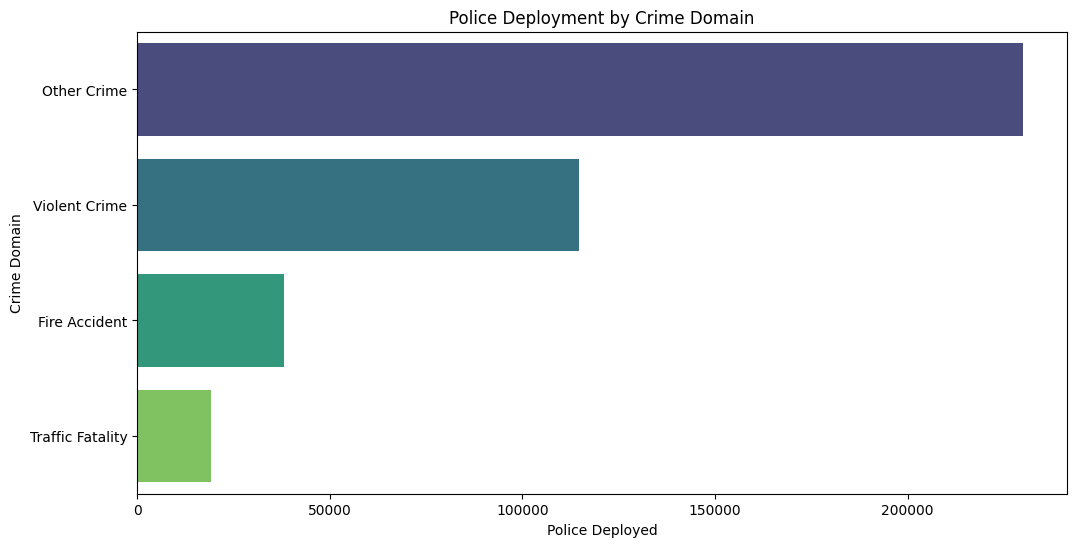

In [52]:
plt.figure(figsize=(12,6))
sns.barplot(data=require, x='Police Deployed', y='Crime Domain',hue='Crime Domain',palette='viridis')
plt.title("Police Deployment by Crime Domain")
plt.show()

### Insights:
* **Other Crime** requires the highest police deployment.
* **Violent Crime** is the second highest in terms of deployment.
* **Fire Accidents** and **Traffic Fatalities** require comparatively fewer police resources.
* Indicates that **Other Crimes and Violent Crimes** are the most resource-intensive for law enforcement.
